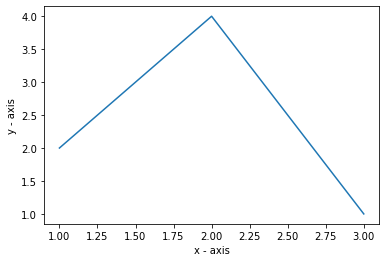

In [8]:
import matplotlib.pyplot as plt

# x axis values
x = [1, 2, 3]
# corresponding y axis values
y = [2,4,1]
 
# plotting the points
plt.plot(x, y)
 
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
 

 
# function to show the plot
plt.show()

In [2]:
import pandas as pd               # a data.frame handler like R
import folium                     # displaying maps
import os
import matplotlib.pyplot as plt
import datetime as dt
import osmnx as ox                # connection to OpenStreetMap
from selenium import webdriver    # for rendering in browser to save as .png
import time
import math
import PIL as pil                 # for saving gifs

In [239]:
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
traffic = pd.read_table(current_file + os.sep +'trafficCounts.csv', sep =';', encoding='latin1')  
traffic.head()

,ZST_NR,SiteCode,SiteName,DateTimeFrom,DateTimeTo,DirectionName,LaneCode,LaneName,ValuesApproved,ValuesEdited,...,Month,Day,Weekday,HourFrom,Date,TimeFrom,TimeTo,DayOfYear,Zst_id,Geo Point
0,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T00:00:00+01:00,2019-01-01T01:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,0,01.01.2019,00:00,01:00,1,235,"47.5751385212,7.56315796773"
1,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T01:00:00+01:00,2019-01-01T02:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,1,01.01.2019,01:00,02:00,1,235,"47.5751385212,7.56315796773"
2,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T02:00:00+01:00,2019-01-01T03:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,2,01.01.2019,02:00,03:00,1,235,"47.5751385212,7.56315796773"
3,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T03:00:00+01:00,2019-01-01T04:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,3,01.01.2019,03:00,04:00,1,235,"47.5751385212,7.56315796773"
4,235,235,"235 A3-A35, Grenze CH-F",2019-01-01T04:00:00+01:00,2019-01-01T05:00:00+01:00,von Frankreich,1,Spur 1,1,0,...,1,1,1,4,01.01.2019,04:00,05:00,1,235,"47.5751385212,7.56315796773"


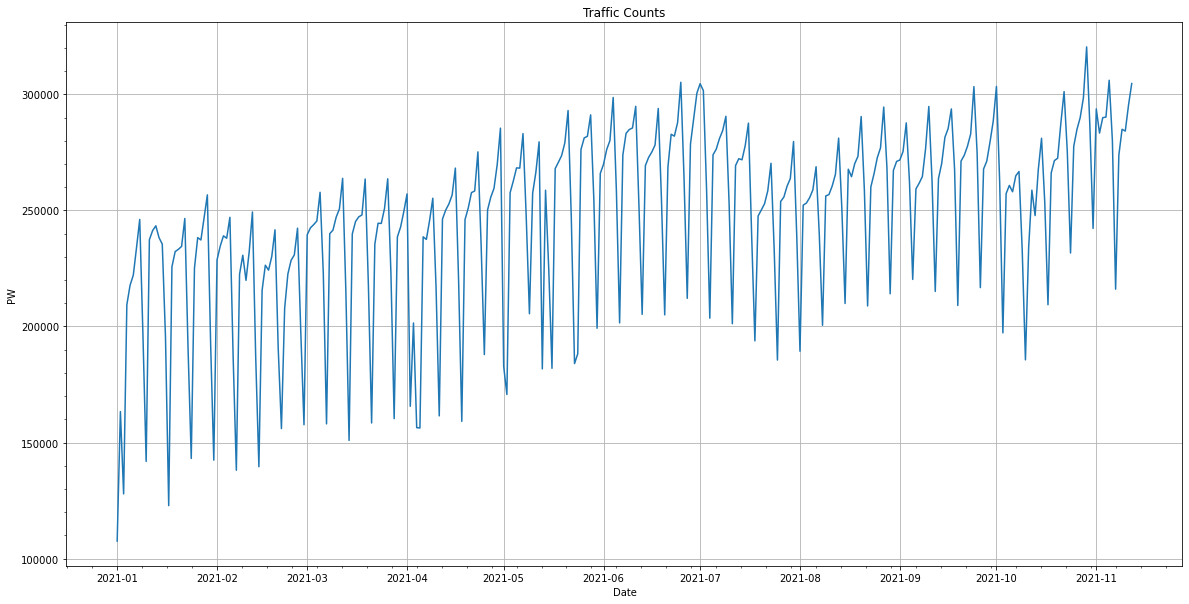

In [263]:
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
traffic = pd.read_table(current_file + os.sep +'trafficCounts.csv', sep =';', encoding='latin1')  

def change_date(date_string):
    sp = date_string.split('T')
    date = sp[0]
    y = int(date.split('-')[0])
    month = int(date.split('-')[1])
    d = int(date.split('-')[2])
    hour = sp[1].split('+')[0]
    h = int(hour.split(':')[0]) 
    m = int(hour.split(':')[1]) 

    if 30 < m <= 59:
        m = 0
        if h == 23:
            h = 0
            if d == 31:
                if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10:
                    month += 1
                    d = 1
                elif month == 12:
                    month = 1
                    d = 1
                    y += 1
            elif d == 30:
                if month == 4 or month == 6 or month == 9 or month == 11:
                    d = 1
                    month += 1
            elif d == 29 and month == 2 and y == 2020:
                month = 2
                d = 1
            elif d == 28 and month == 2 and (y == 2019 or y == 2021):
                month = 2
                d = 1
            else:
                d += 1
        else:
            h += 1
    else:
        m = 0

    return dt.datetime(y, month, d, h, m)


traffic['date'] = traffic['DateTimeTo'].apply(lambda x: change_date(x))
traffic[['lat','lng']] = traffic['Geo Point'].str.split(',', expand = True)

traffic = traffic[traffic['SiteCode'] < 1000]

agg = traffic.groupby([traffic['date'].dt.date]).PW.agg('sum')
agg = agg.reset_index()

agg['date'] = pd.to_datetime(agg['date'])
tmp = agg[agg['date'].dt.year == 2021]



x = tmp['date']
y = tmp['PW']

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(x, y)
plt.title('Traffic Counts')
plt.xlabel('Date')
plt.ylabel('PW')
plt.minorticks_on()
plt.grid(which = 'major')
plt.show()

In [45]:
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
parcLot = pd.read_table(current_file + os.sep +'parcLot.csv', sep =';', encoding='utf-8')  
df.head()

,Publikationszeit,Anzahl frei,id,id2,Titel,Name,Adresse,Total Plätze,link,geo_point_2d,Beschreibung
0,2021-09-10T13:55:13+02:00,29,baselparkhausaeschen,aeschen,Parkhaus Aeschen,Aeschen,Aeschengraben 9,97,https://www.parkleitsystem-basel.ch/parkhaus/a...,"47.5504299,7.5943046",Anzahl freie Parkplätze: 29
1,2021-09-10T14:55:13+02:00,71,baselparkhauseurope,europe,Parkhaus Europe,Europe,Hammerstrasse 68,120,https://www.parkleitsystem-basel.ch/parkhaus/e...,"47.5630411,7.5967098",Anzahl freie Parkplätze: 71
2,2021-09-10T14:55:13+02:00,84,baselparkhausclaramatte,claramatte,Parkhaus Claramatte,Claramatte,Klingentalstrasse 25,100,https://www.parkleitsystem-basel.ch/parkhaus/c...,"47.5639644,7.5946604",Anzahl freie Parkplätze: 84
3,2021-09-10T14:55:13+02:00,27,baselparkhausclarahuus,clarahuus,Parkhaus Clarahuus,Clarahuus,Webergasse 34,52,https://www.parkleitsystem-basel.ch/parkhaus/c...,"47.5622725,7.5917937",Anzahl freie Parkplätze: 27
4,2021-09-10T14:55:13+02:00,216,baselparkhauscity,city,Parkhaus City,City,Schanzenstrasse 48,1114,https://www.parkleitsystem-basel.ch/parkhaus/city,"47.561101,7.5824076",Anzahl freie Parkplätze: 216


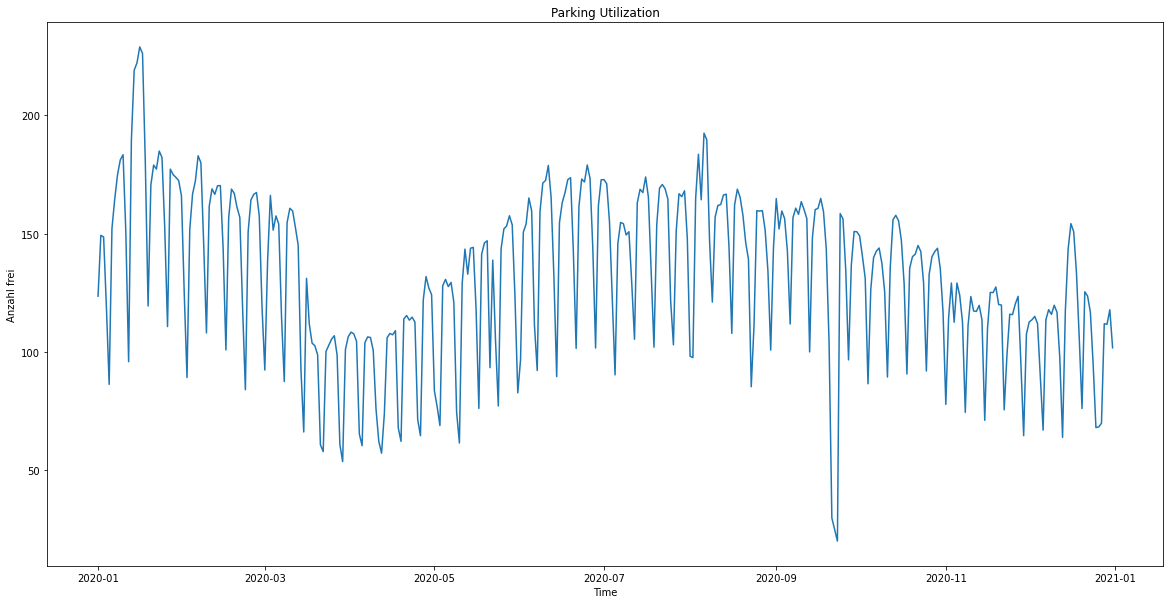

In [333]:
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
parcLot = pd.read_table(current_file + os.sep +'parcLot.csv', sep =';', encoding='utf-8')

def change_date(date_string):
    sp = date_string.split('T')
    date = sp[0]
    y = int(date.split('-')[0])
    month = int(date.split('-')[1])
    d = int(date.split('-')[2])
    hour = sp[1].split('+')[0]
    h = int(hour.split(':')[0]) 
    m = int(hour.split(':')[1]) 

    if 30 < m <= 59:
        m = 0
        if h == 23:
            h = 0
            if d == 31:
                if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10:
                    month += 1
                    d = 1
                elif month == 12:
                    month = 1
                    d = 1
                    y += 1
            elif d == 30:
                if month == 4 or month == 6 or month == 9 or month == 11:
                    d = 1
                    month += 1
            elif d == 29 and month == 2 and y == 2020:
                month = 2
                d = 1
            elif d == 28 and month == 2 and (y == 2018 or y == 2019 or y == 2021):
                month = 2
                d = 1
            else:
                d += 1
        else:
            h += 1
    else:
        m = 0

    return dt.datetime(y, month, d, h, m)

def change_park_capacity(entry, name ,d):
    d_d = d.get('Anzahl frei')
    value = d_d.get(name)
    if name != 'Europe' and entry < value:
        entry = value    
    return entry
    
def change_park_free(entry, name, d):
    d_d = d.get('Total Plätze')
    value = d_d.get(name)    
    # change europe where its obviously false
    if name == 'Europe' and entry > value :
        entry = value           
            
    return entry

parcLot['date'] = parcLot['Publikationszeit'].apply(lambda x: change_date(x))
parcLot[['lat','lng']] = parcLot['geo_point_2d'].str.split(',', expand=True)

max_free = pd.DataFrame(park.groupby(['name'])[['Anzahl frei','Total Plätze']].max()).reset_index()
d = max_free.set_index(['name']).to_dict()
park['free'] = park.apply(lambda row: change_park_free(row['Anzahl frei'], row['name'], d), axis=1)
park['capacity'] = park.apply(lambda row: change_park_capacity(row['Total Plätze'], row['name'] ,d), axis=1)
check_max_free = pd.DataFrame(park.groupby(['name'])[['free','capacity']].max()).reset_index()
park['utilization'] = (park['capacity'] - park['free']) / park['capacity']  

agg = park.groupby([parcLot['date'].dt.date]).sum()
agg = agg.reset_index()

agg['date'] = pd.to_datetime(agg['date'])
tmp = agg[agg['date'].dt.year == 2020]

#print(tmp)
outliers = tmp[tmp['Total Plätze'] != 4913]
#print(outliers)
inaccurate = tmp[tmp['Total Plätze'] < tmp['Anzahl frei']]
#print(inaccurate)


x = tmp['date']
y = tmp['utilization']

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(x, y)
plt.title('Parking Utilization')
plt.xlabel('Time')
plt.ylabel('Anzahl frei')
plt.show()

In [313]:
test = parcLot.at[1,'date']
parcLot['date'] = pd.to_datetime(parcLot['date'])
test = parcLot.at[1,'date']
type(test)
tmp = parcLot[parcLot['date'].dt.year == 2020]
print(tmp)

In [ ]:
parcLot.drop(parcLot.loc[parcLot['Anzahl frei'] > 1000].index, inplace=True)

parcLot = pd.parcLot('date')
parcLot.index = pd.to_datetime(parcLot['date'],format='%m/%d/%y %I:%M%p')
parcLot.groupby(by=[parcLot.index.day, parcLot.index.month, parcLot.index.year])


agg = pd.DataFrame(parcLot.groupby(parcLot['date'])[['Total Plätze','Anzahl frei']].sum()).reset_index()

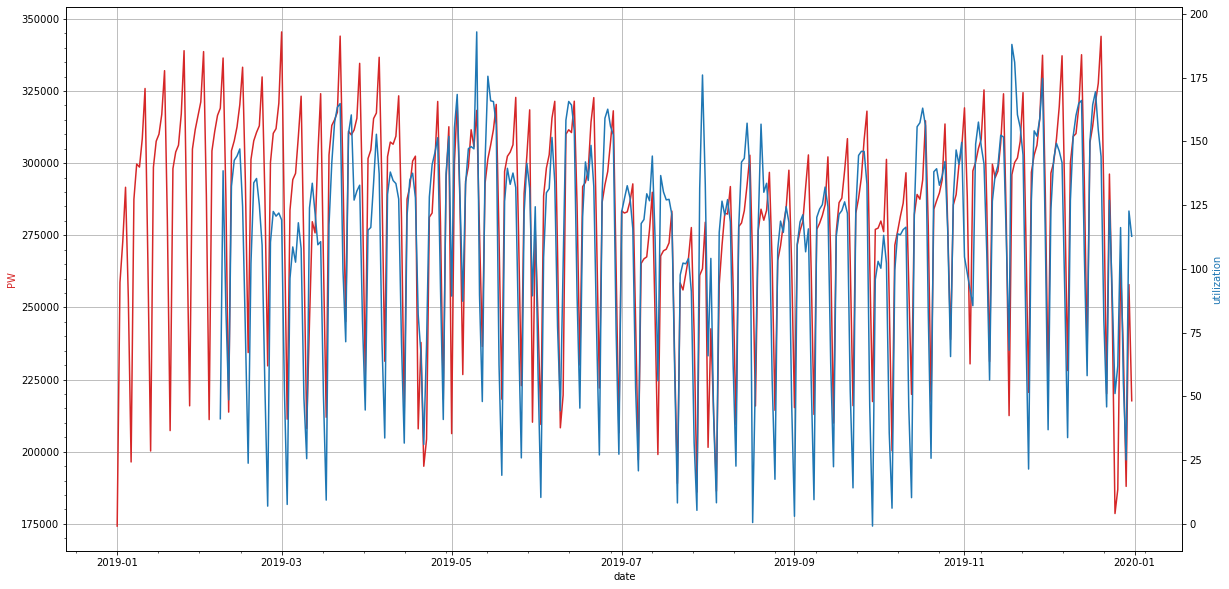

In [328]:
current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
traffic = pd.read_table(current_file + os.sep +'trafficCounts.csv', sep =';', encoding='latin1')  

current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
parcLot = pd.read_table(current_file + os.sep +'parcLot.csv', sep =';', encoding='utf-8')

def change_date(date_string):
    sp = date_string.split('T')
    date = sp[0]
    y = int(date.split('-')[0])
    month = int(date.split('-')[1])
    d = int(date.split('-')[2])
    hour = sp[1].split('+')[0]
    h = int(hour.split(':')[0]) 
    m = int(hour.split(':')[1]) 
    
    if m != 0:
        m = 0
        if h == 23:
            h = 0
        else:
            h += 1
    return dt.datetime(y, month, d, h, m)
 
traffic['date'] = traffic['DateTimeTo'].apply(lambda x: change_date(x)) 
traffic[['lat','lng']] = traffic['Geo Point'].str.split(',', expand=True)
parcLot['date'] = parcLot['Publikationszeit'].apply(lambda x: change_date(x))
parcLot[['lat','lng']] = parcLot['geo_point_2d'].str.split(',', expand=True)
parcLot['utilization'] = (parcLot['Total Plätze'] - parcLot['Anzahl frei']) / parcLot['Total Plätze']

traffic = traffic[traffic['SiteCode'] < 1000]

agg = traffic.groupby([traffic['date'].dt.date]).PW.agg('sum')
ag = parcLot.groupby([parcLot['date'].dt.date]).sum()
agg = agg.reset_index()
ag = ag.reset_index()

agg['date'] = pd.to_datetime(agg['date'])
tmp = agg[agg['date'].dt.year == 2019]

fig, ax1 = plt.subplots() 
  
color = 'tab:red'
ax1.set_xlabel('date') 
ax1.set_ylabel('PW', color = color) 
ax1.plot(tmp['date'], tmp['PW'], color = color)

ag['date'] = pd.to_datetime(ag['date'])
tmp = ag[ag['date'].dt.year == 2019]

plt.minorticks_on()
plt.grid()

ax2 = ax1.twinx() 
  
color = 'tab:blue'
ax2.set_ylabel('utilization', color = color)
ax2.plot(tmp['date'], tmp['utilization'], color = color) 
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

           date  Anzahl frei  Total Plätze   free  capacity  utilization
191  2019-08-17        28064         29478  28064     35400    21.837791
589  2020-09-21        38150         44217  38150     53100    29.483526
590  2020-09-23        15250         19652  15250     23600    19.701400


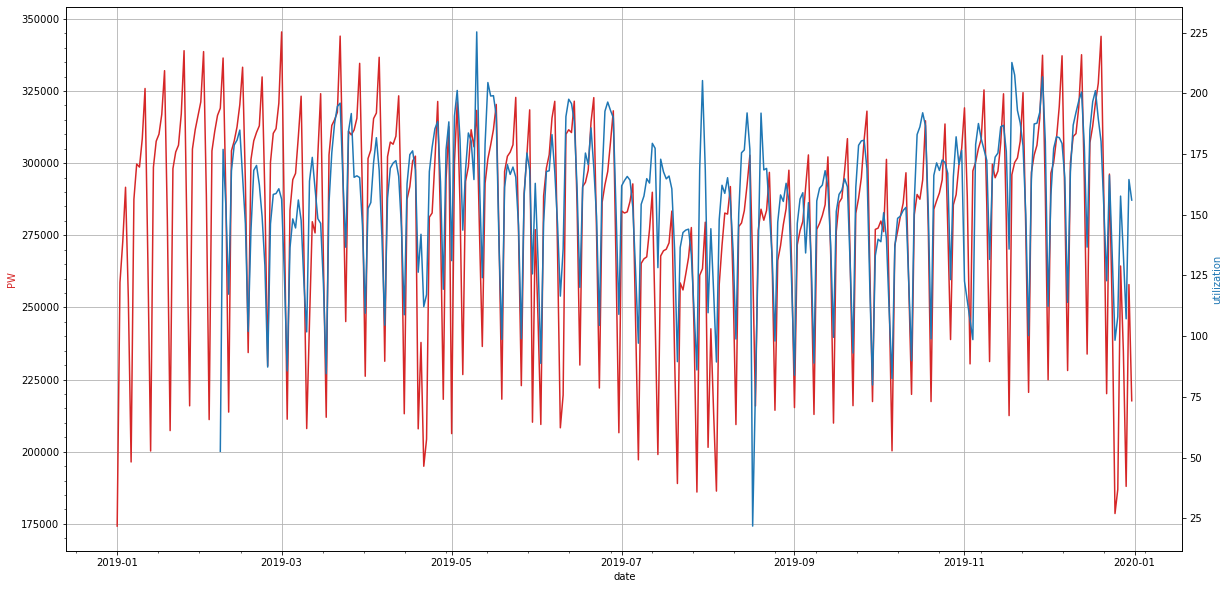

In [326]:
import numpy as np

current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
traffic = pd.read_table(current_file + os.sep +'trafficCounts.csv', sep =';', encoding='latin1')  

current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
parcLot = pd.read_table(current_file + os.sep +'parcLot.csv', sep =';', encoding='utf-8')


def change_date(date_string):
    sp = date_string.split('T')
    date = sp[0]
    y = int(date.split('-')[0])
    month = int(date.split('-')[1])
    d = int(date.split('-')[2])
    hour = sp[1].split('+')[0]
    h = int(hour.split(':')[0]) 
    m = int(hour.split(':')[1]) 
    
    if 30 < m <= 59:
        m = 0
        if h == 23:
            h = 0
            if d == 31:
                if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10:
                    month += 1
                    d = 1
                elif month == 12:
                    month = 1
                    d = 1
                    y += 1
            elif d == 30:
                if month == 4 or month == 6 or month == 9 or month == 11:
                    d = 1
                    month += 1
            elif d == 29 and month == 2 and y == 2020:
                month = 2
                d = 1
            elif d == 28 and month == 2 and (y == 2018 or y == 2019 or y == 2021):
                month = 2
                d = 1
            else:
                d += 1
        else:
            h += 1
    else:
        m = 0

    return dt.datetime(y, month, d, h, m)

def change_park_capacity(entry, name ,d):
    d_d = d.get('Anzahl frei')
    value = d_d.get(name)
    if name != 'Europe' and entry < value:
        entry = value    
    return entry
    
def change_park_free(entry, name, d):
    d_d = d.get('Total Plätze')
    value = d_d.get(name)    
    # change europe where its obviously false
    if name == 'Europe' and entry > value :
        entry = value           
            
    return entry
 
traffic['date'] = traffic['DateTimeTo'].apply(lambda x: change_date(x)) 
traffic[['lat','lng']] = traffic['Geo Point'].str.split(',', expand=True)
parcLot['date'] = parcLot['Publikationszeit'].apply(lambda x: change_date(x))
parcLot[['lat','lng']] = parcLot['geo_point_2d'].str.split(',', expand=True)


max_free = pd.DataFrame(park.groupby(['name'])[['Anzahl frei','Total Plätze']].max()).reset_index()
d = max_free.set_index(['name']).to_dict()
park['free'] = park.apply(lambda row: change_park_free(row['Anzahl frei'], row['name'], d), axis=1)
park['capacity'] = park.apply(lambda row: change_park_capacity(row['Total Plätze'], row['name'] ,d), axis=1)
check_max_free = pd.DataFrame(park.groupby(['name'])[['free','capacity']].max()).reset_index()
park['utilization'] = (park['capacity'] - park['free']) / park['capacity']  


traffic = traffic[traffic['SiteCode'] < 1000]

agg = traffic.groupby([traffic['date'].dt.date]).PW.agg('sum')
ag = park.groupby([parcLot['date'].dt.date]).sum()
agg = agg.reset_index()
ag = ag.reset_index()

drop = ag[ag['utilization'] < 50]
print(drop)
        
agg['date'] = pd.to_datetime(agg['date'])
tmp = agg[agg['date'].dt.year == 2021]

fig, ax1 = plt.subplots() 
  
color = 'tab:red'
ax1.set_xlabel('date') 
ax1.set_ylabel('PW', color = color) 
ax1.plot(tmp['date'], tmp['PW'], color = color)

ag['date'] = pd.to_datetime(ag['date'])
tmp = ag[ag['date'].dt.year == 2021]

plt.minorticks_on()
plt.grid()

ax2 = ax1.twinx() 
  
color = 'tab:blue'
ax2.set_ylabel('utilization', color = color)
ax2.plot(tmp['date'], tmp['utilization'], color = color) 
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

In [214]:
import pandas as pd               # a data.frame handler like R
import folium                     # displaying maps
from folium.plugins import BeautifyIcon
import os, sys
import matplotlib.pyplot as plt

import osmnx as ox                # connection to OpenStreetMap
from selenium import webdriver    # for rendering in browser to save as .png
import datetime as dt
import math
import PIL as pil                 # for saving gifs

import time


""" 
functions
"""
def change_site_name(site_name):
    sp = site_name.split(' ',1)
    return sp[1]

def change_park_capacity(entry, name ,d):
    d_d = d.get('Anzahl frei')
    value = d_d.get(name)
    if name != 'Europe' and entry < value:
        entry = value    
    return entry
    
def change_park_free(entry, name, d):
    d_d = d.get('Total Plätze')
    value = d_d.get(name)    
    # change europe where its obviously false
    if name == 'Europe' and entry > value :
        entry = value           
            
    return entry

def plot_dot_park(row, color, map_obj):
    #radius = row.PW / maxPW * 10
    folium.Circle(location=[row.lat, row.lng],radius=30, color = color,
                        fill=True, fillcolor = color, fill_opacity =1, 
                        tooltip=row['name'] +': Total ' + str(row['Total Plätze']) 
                        + ' Plätze'
                        ).add_to(map_obj)

def plot_dot_traffic(row, color, map_obj):
    #radius = row.PW / maxPW * 10
    folium.Circle(location=[row.lat, row.lng],radius=30, color = color,
                        fill=True, fillcolor = color, fill_opacity =1, 
                        tooltip=row['name'] +': '  + str(int(row['average']))
                        + ' cars on average per hour 2019'
                        ).add_to(map_obj)

def plot_park_cluster(cord, color, map_obj):
    folium.Circle(location=cord, radius=450, fill_color = color,
                  fill=True, color='grey', weight=1, fill_opacity=0.4).add_to(map_obj)
    
def plot_arrow(cord, angle, color, map_obj):
    icon_arrow = BeautifyIcon(
        icon=' fa fa-angle-double-down',
        inner_icon_style="""font-size:9rem;transform: rotate({0}deg);
                    color:{1};opacity:0.6;""".format(angle, color),
        background_color='transparent',
        border_color='transparent',
    )
    
    # add arrow
    folium.Marker(location=cord, icon=icon_arrow).add_to(map_obj)
    
def change_date(df, time_col, unique_col, new_col):
    df = df.copy()  # copy need if changes in dataframe, else just reference
    # convert date str to utc rounded hours
    df[new_col] = pd.to_datetime(df[time_col], utc = True)
    # round on 15 minutes, the get those nearest to full hour
    df[new_col] = df[new_col].dt.round('15min')
    # drop duplicates 
    df = df.drop_duplicates(subset = [new_col, unique_col])
    # round on full hour
    df[new_col]  = df[new_col].dt.round('H')    
    # drop duplicates 
    df = df.drop_duplicates(subset = [new_col, unique_col])
    # only use those at full hour
    return df

def check_on_date(df, df_ori, time_col, time_col_ori, number_per_hour):
    # check
    check = pd.DataFrame(df[time_col].value_counts())
    # all not number_per_hour: e.g 15 parkings
    print('Rows where value counts not equals ',number_per_hour,':',
          len(check[check[time_col] != number_per_hour])) # no rows
    # are all hours in in?
    # create timestamps over full period of original dataframe
    end_date = max(pd.to_datetime(df_ori[time_col_ori], utc=True).dt.round('H'))
    start_date = min(pd.to_datetime(df_ori[time_col_ori], utc=True).dt.round('H'))
    def daterange(start_date, end_date):
        delta = dt.timedelta(hours=1)
        while start_date < end_date:
            yield start_date
            start_date += delta
    
    all_l = []
    for single_date in daterange(start_date, end_date):
        all_l.append(single_date)
    
    # check whats missing
    here_l = list(df[time_col].unique())
    missing = list(set(all_l).difference(set(here_l)))
    print(len(missing),'hours are missing in the original set')
    missing.sort()
    return (check, missing)      
  

# # path setting for all the scripts
# sys.path.append(os.path.dirname(__file__))
# # path setting for all the data
# parent_path = os.path.join(os.path.dirname(os.path.dirname(__file__)))
#parent_path = 'D://ComputerScience//S5//CSAI4SG//git//project'

current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
traffic_raw = pd.read_table(current_file + os.sep +'trafficCounts.csv', sep =';', encoding='latin1')  

current_file = globals()['_dh'][0]  # absolut path of this file working in jupyter notebook
park_raw = pd.read_table(current_file + os.sep +'parcLot.csv', sep =';', encoding='utf-8')


"""
scrip
"""
traffic = traffic_raw.copy()
park = park_raw.copy()

# drop those from germany and frances
traffic = traffic[traffic['SiteCode'] < 1000]  # SiteCode are integers

# rename geoPoint columns to match in both dataset
traffic.rename(columns={'Geo Point': 'geoPoint'}, inplace = True)
park.rename(columns={'geo_point_2d': 'geoPoint'}, inplace = True)

# rename the name of the side as we use this in visualization
park.rename(columns={'Name': 'name'}, inplace = True)
# names for traffic site
traffic['name'] = traffic['SiteName'].apply(lambda x: change_site_name(x)) 

# use function to change date
park = change_date(park, 'Publikationszeit', 'name', 'date')
# check dates in park
value_counts_p, mis_p = check_on_date(park, park_raw, 'date', 'Publikationszeit', 15)
# some days and hours are missing completely, check mis_p

# use function to change date
traffic = change_date(traffic, 'DateTimeTo', 'name', 'date')
# check dates in traffic, there are 29 unique counting stations
value_counts_t, mis_t = check_on_date(traffic, traffic_raw, 'date', 'DateTimeTo', 29)
# many counting stations have not full set, check value_counts_t
# e.g. aussere Baselstrasse missing for 2019-03-24, 23:00

# change geopoints
park[['lat','lng']] = park['geoPoint'].str.split(',', expand=True) 
traffic[['lat','lng']] = traffic['geoPoint'].str.split(',', expand=True) 

# names for traffic site
traffic['name'] = traffic['SiteName'].apply(lambda x: change_site_name(x)) 

# there are cases where there are more Anzahl frei then Total Plätze
# it seems the capacity of the parkings is not accurate, as the 
# freie plätze is given the rrs of the ParkLeitSystem of Basel
# our solution. set the capacity to the highest value of ever freie platze
# for cases where there are more freie Plätze then Anzahl
max_free = pd.DataFrame(park.groupby(['name'])[['Anzahl frei','Total Plätze']].max()).reset_index()
# make dictionary with name as index
d = max_free.set_index(['name']).to_dict()
park['free'] = park.apply(lambda row: change_park_free(row['Anzahl frei'], row['name'], d), axis=1)
park['capacity'] = park.apply(lambda row: change_park_capacity(row['Total Plätze'], row['name'] ,d), axis=1)
check_max_free = pd.DataFrame(park.groupby(['name'])[['free','capacity']].max()).reset_index()

# utilization
park['utilization'] = (park['capacity'] - park['free']) / park['capacity']  

# average counts over 2019 per day
# select 2019 data
df2019 = traffic[traffic['date'].dt.year == 2019]
# average over PW group by site
df2019_avg = pd.DataFrame(df2019.groupby('name')['PW'].mean())
df2019_avg.rename(columns={'PW' : 'average'}, inplace=True)
# merge that to traffic
traffic = traffic.merge(df2019_avg, left_on = 'name', right_on = 'name', 
                     how = 'left').set_axis(traffic.index) 

# add clustering to data
traffic = traffic.merge(traffic_cluster[['geoPoint','DirectionName','cluster']], 
                    left_on = ['geoPoint','DirectionName'], right_on = ['geoPoint','DirectionName'], 
                     how = 'left').set_axis(traffic.index)
park = park.merge(park_cluster[['geoPoint','cluster']], left_on = 'geoPoint', right_on = 'geoPoint', 
                     how = 'left').set_axis(park.index) 


# html for overview:
# - - - - - - - - -
# select unique geo koordinates
u_traffic = traffic[['lat','lng','name', 'average']].drop_duplicates()
u_park = park[['lat','lng','name','Total Plätze']].drop_duplicates()


m = folium.Map(basel, width=975, height =575, zoom_start=14, tiles='CartoDB Positron')
u_park.apply(plot_dot_park, color = 'blue', map_obj = m, axis = 1)
u_traffic.apply(plot_dot_traffic, color = 'red', map_obj = m, axis = 1)

m.save("overview.html")

# html for clustering
# - - - - - - - - - 
m = folium.Map(basel, width=975, height =575, zoom_start=14, tiles='CartoDB Positron')
plot_clusters(m)
m.save("clusters.html")

# create the html for over time for the clusters
# - - - - - - - - - - - - - - - - - - - - 

# aggregate data over cluster for traffic and parking by time
# reset index to keep by cols as columns and not as index
t_cluster = pd.DataFrame(traffic.groupby(['cluster','date'])['PW'].sum()).reset_index()
p_cluster = pd.DataFrame(park.groupby(['cluster','date'])
                         [['Total Plätze','Anzahl frei']].sum()).reset_index()

# calculate utilization
p_cluster['utilization'] = (p_cluster['Total Plätze'] - p_cluster['Anzahl frei']) / p_cluster['Total Plätze']  

# intersect time span of two dataframe
time_intersect = list(set(t_cluster['date']).intersection(p_cluster['date']))
# loop over time
relevant_time = [x for x in time_intersect if dt.datetime(2020,2,1) <= x < dt.datetime(2020,2,8)]
relevant_time.sort()

# # some seem to miss: RKR checked 2021-12-11 an its ok after changing change_date() if clause
# p_rel = p_cluster.loc[(p_cluster['date'] > '2020-02-03 16:00') & (p_cluster['date'] < '2020-02-04 01:00')]
# t_rel = t_cluster.loc[(t_cluster['date'] > '2020-02-03 16:00') & (t_cluster['date'] < '2020-02-04 01:00')]

for hour in relevant_time():
    # select data
    p = p_cluster.loc[(p_cluster['date'] == hour)]
    t = t_cluster.loc[(t_cluster['date'] == hour)]
    
    # do the map
    m = folium.Map(basel, width=975, height =575, zoom_start=14, tiles='CartoDB Positron')
    
    



# html to pgn
mapFname = 'mymap.html'
mapUrl = 'file://{0}/{1}'.format(os.getcwd(), mapFname)
# use selenium webdriver to save the html as png image
driver = webdriver.Firefox()
driver.set_window_size(1000, 700)
driver.set_window_position(0, 0)
driver.get(mapUrl)
# wait for 2 seconds for the maps and other assets to be loaded in the browser
time.sleep(2)
driver.save_screenshot(os.path.join('png','o.png'))
driver.quit()

# add a title to the html
loc = traffic.at[1,'date'].strftime("%A %d %B, %Y - %I%p")
title_html = '''
             <h3 align="center" style="font-size:16px; background-color:rgb(220,220,220);"><b>{}</b></h3>
             '''.format(loc)   

m.get_root().html.add_child(folium.Element(title_html))



# plot line for all counting stations
agg = traffic.groupby(['date']).PW.agg('sum')
agg = agg.reset_index()

# select just on hour
hour_slice = agg[agg['date'].dt.hour == 10]
x = hour_slice['date']
y = hour_slice['PW']

# plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
ax.plot(x,y)



Rows where value counts not equals  15 : 0
258 hours are missing in the original set
Rows where value counts not equals  29 : 23904
0 hours are missing in the original set


NameError: name 'traffic_cluster' is not defined